In [152]:
import pandas as pd
import numpy as np

import os
import glob

import matplotlib.pyplot as plt
import seaborn as sns


# Load data

In [153]:
folder_path = "data/"

csv_files = glob.glob(os.path.join(folder_path, "*.csv"))

dfs = []
for file_path in csv_files:
    df = pd.read_csv(file_path)
    
    filename = os.path.basename(file_path)
    filename_without_ext = os.path.splitext(filename)[0]
    clean_filename = filename_without_ext.replace("_pop_hist", "")
    
    df['variants'] = clean_filename
    df['generation'] = (df.index // 50) + 1

    dfs.append(df)

combined_df = pd.concat(dfs, ignore_index=True)
combined_df.drop('Unnamed: 0', axis=1, inplace=True)
combined_df.head()

,learning_rate,kernel_size,batch_size,optimizer,n_hidden_layers,neurons,fitness,variants,generation
0,0.008285,3,128,adam,1,[32],0.979500,sus,1
1,0.008285,3,128,adam,1,[32],0.977143,sus,1
2,0.000262,3,128,rmsprop,2,"[32, 32]",0.972643,sus,1
3,0.000395,7,128,rmsprop,3,"[16, 256, 128]",0.981929,sus,1
4,0.005859,3,32,sgd,2,"[16, 64]",0.950786,sus,1


In [154]:
rename = {
    'sus':'Stochastic Universal Sampling',
    'steady-state':'Steady-State',
    'lhs':'Latin Hypercube Sampling',
    'standard':'Standard',
    'adaptive':'Adaptive Mutation',
    'uniform':'Uniform Crossover',

}

combined_df['variants'] = combined_df['variants'].replace(rename)
combined_df.head()

,learning_rate,kernel_size,batch_size,optimizer,n_hidden_layers,neurons,fitness,variants,generation
0,0.008285,3,128,adam,1,[32],0.979500,Stochastic Universal Sampling,1
1,0.008285,3,128,adam,1,[32],0.977143,Stochastic Universal Sampling,1
2,0.000262,3,128,rmsprop,2,"[32, 32]",0.972643,Stochastic Universal Sampling,1
3,0.000395,7,128,rmsprop,3,"[16, 256, 128]",0.981929,Stochastic Universal Sampling,1
4,0.005859,3,32,sgd,2,"[16, 64]",0.950786,Stochastic Universal Sampling,1


# Graphs

In [155]:
best_fitness_combined_df = combined_df.groupby(['variants', 'generation'])['fitness'].max().reset_index()
consistent_variant_order = combined_df['variants'].unique().tolist()

num_variants = len(consistent_variant_order)
base_colors = sns.color_palette("Paired")
color_map = {variant: base_colors[i] for i, variant in enumerate(consistent_variant_order)}

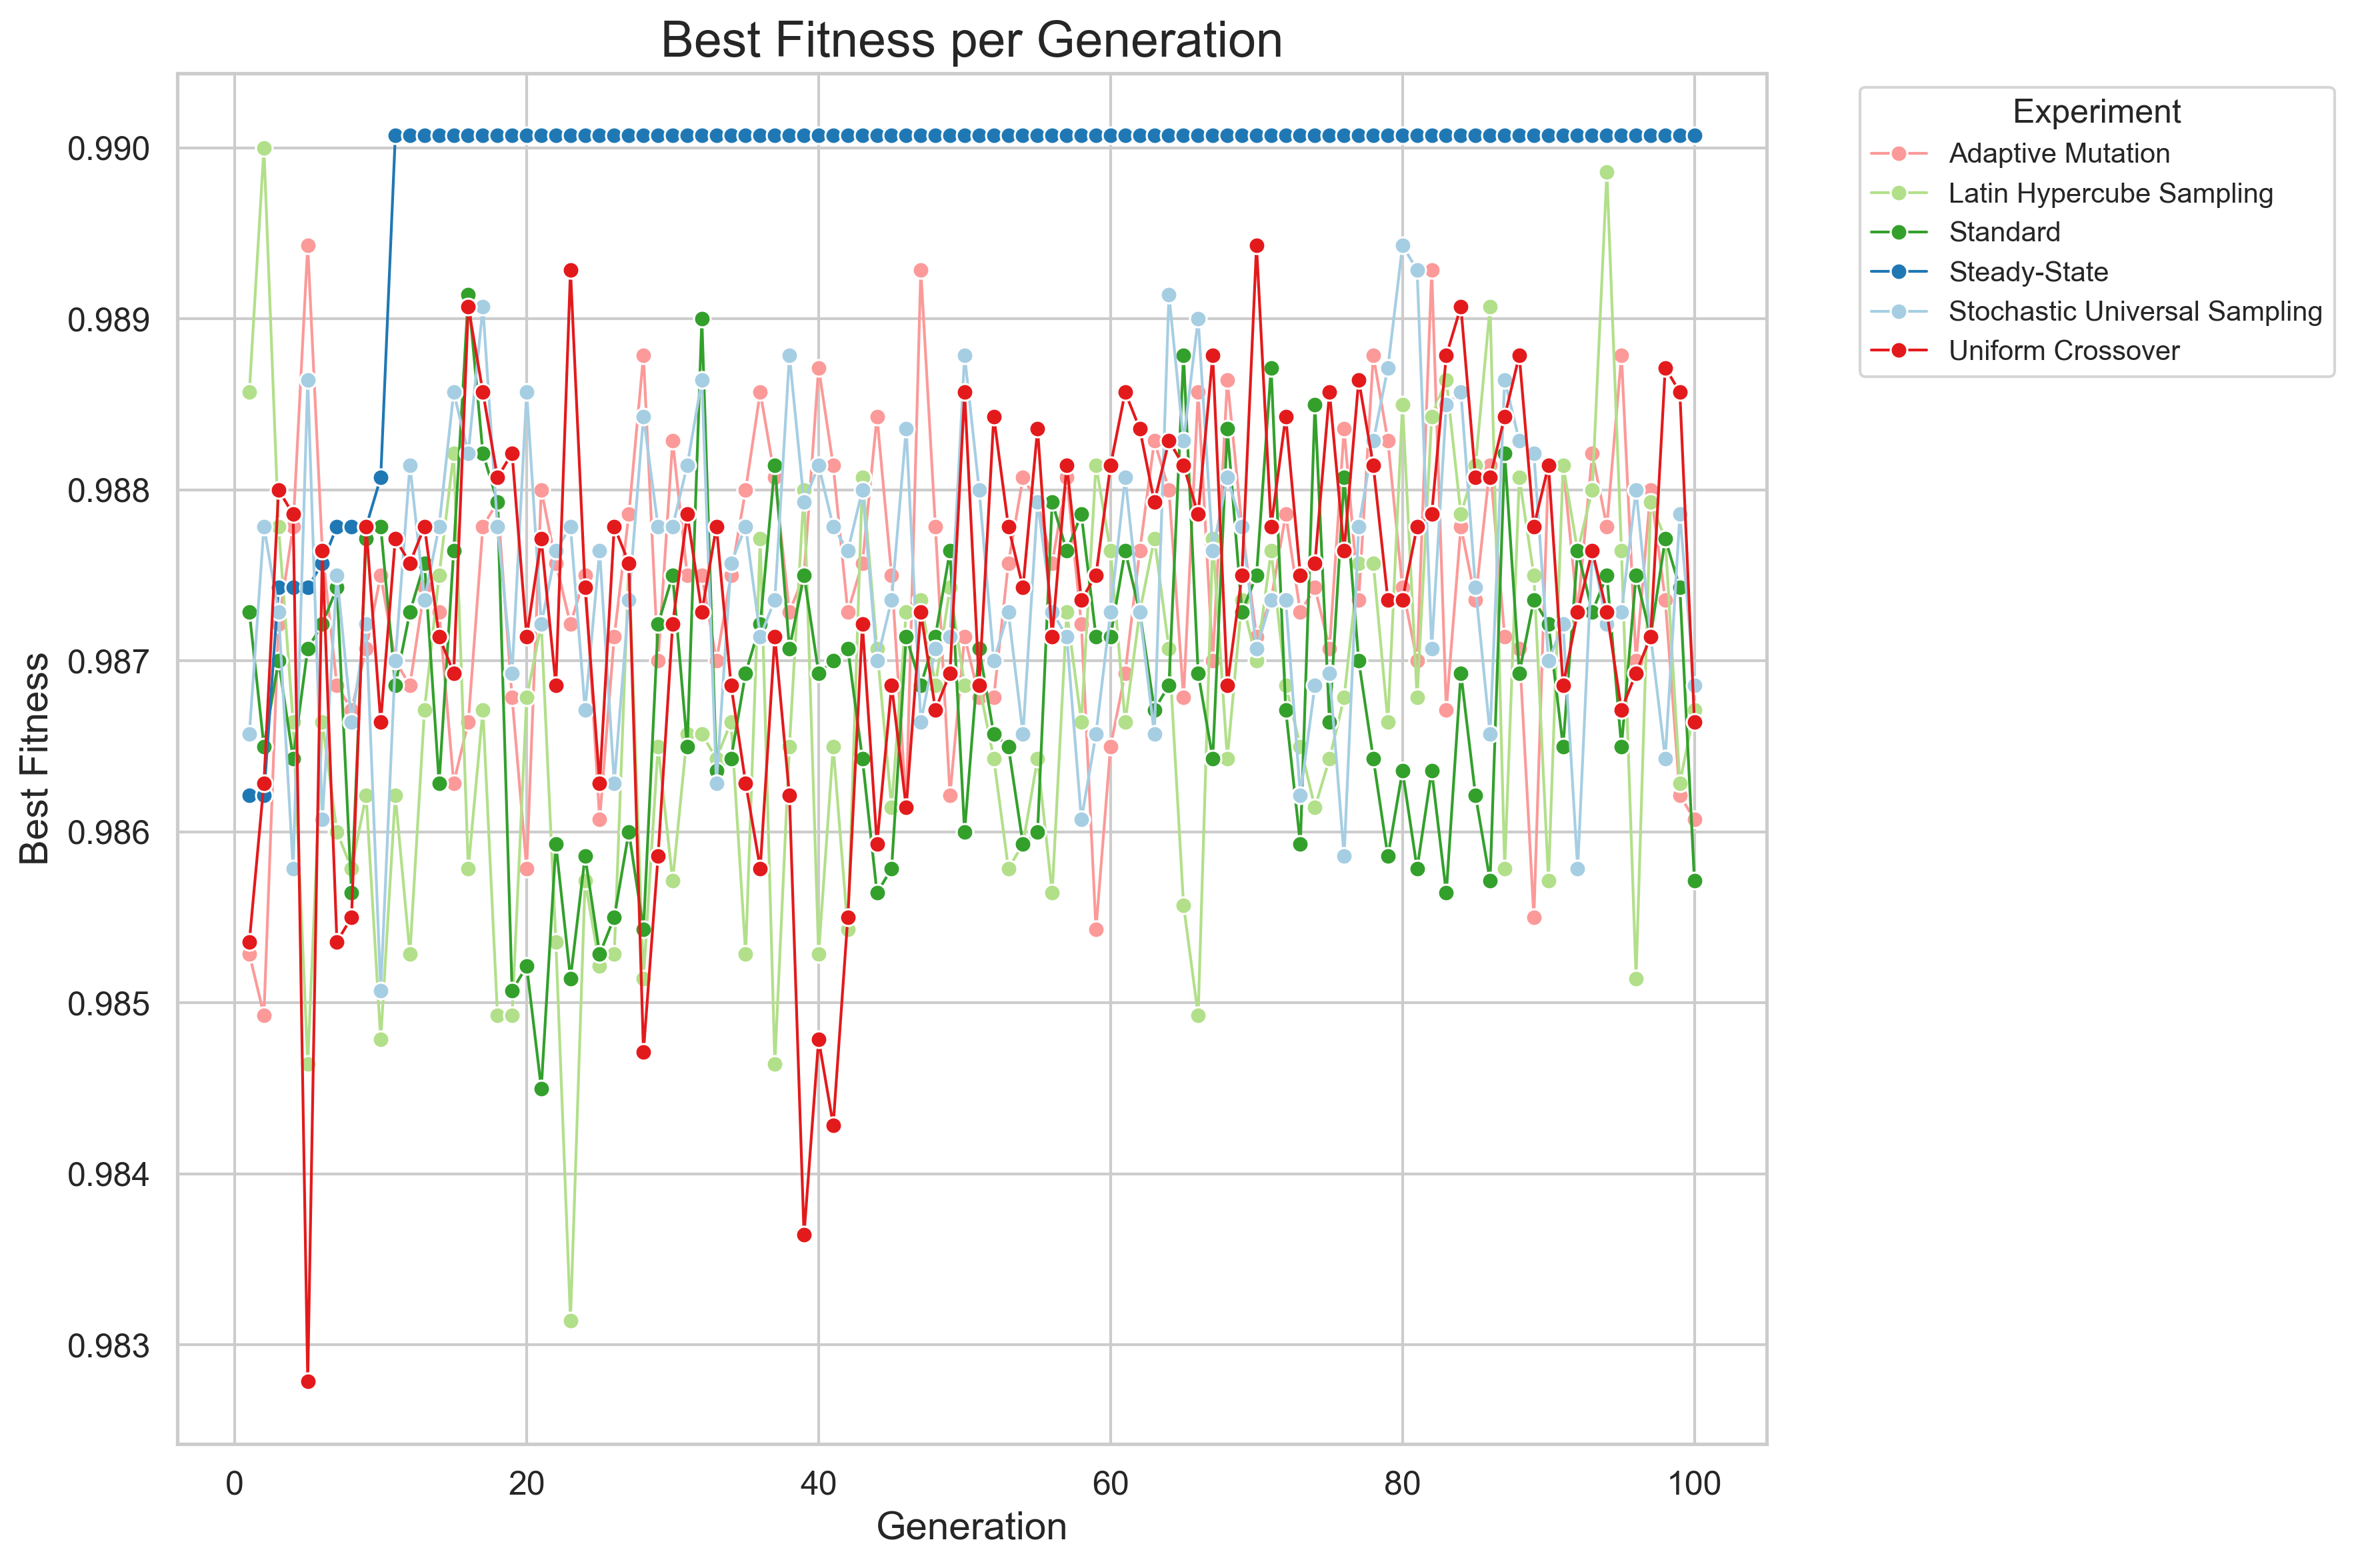

Saved plot to plots/combined_best_fitness_plot_high_quality.png


In [156]:
plt.figure(figsize=(12, 8), dpi=300)
plot1 = sns.lineplot(
    data=best_fitness_combined_df,
    x='generation',
    y='fitness',
    hue='variants',
    marker='o',
    linewidth=1,
    palette=color_map,
)
plot1.set_title('Best Fitness per Generation', fontsize=18)
plot1.set_xlabel('Generation', fontsize=14)
plot1.set_ylabel('Best Fitness', fontsize=14)
plot1.tick_params(axis='both', which='major', labelsize=12)
plot1.legend(title='Experiment', fontsize=10, title_fontsize=12, bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()

plot1_file = 'plots/combined_best_fitness_plot_high_quality.png'
plt.savefig(plot1_file)
plt.show()
print(f"Saved plot to {plot1_file}")
plt.close()

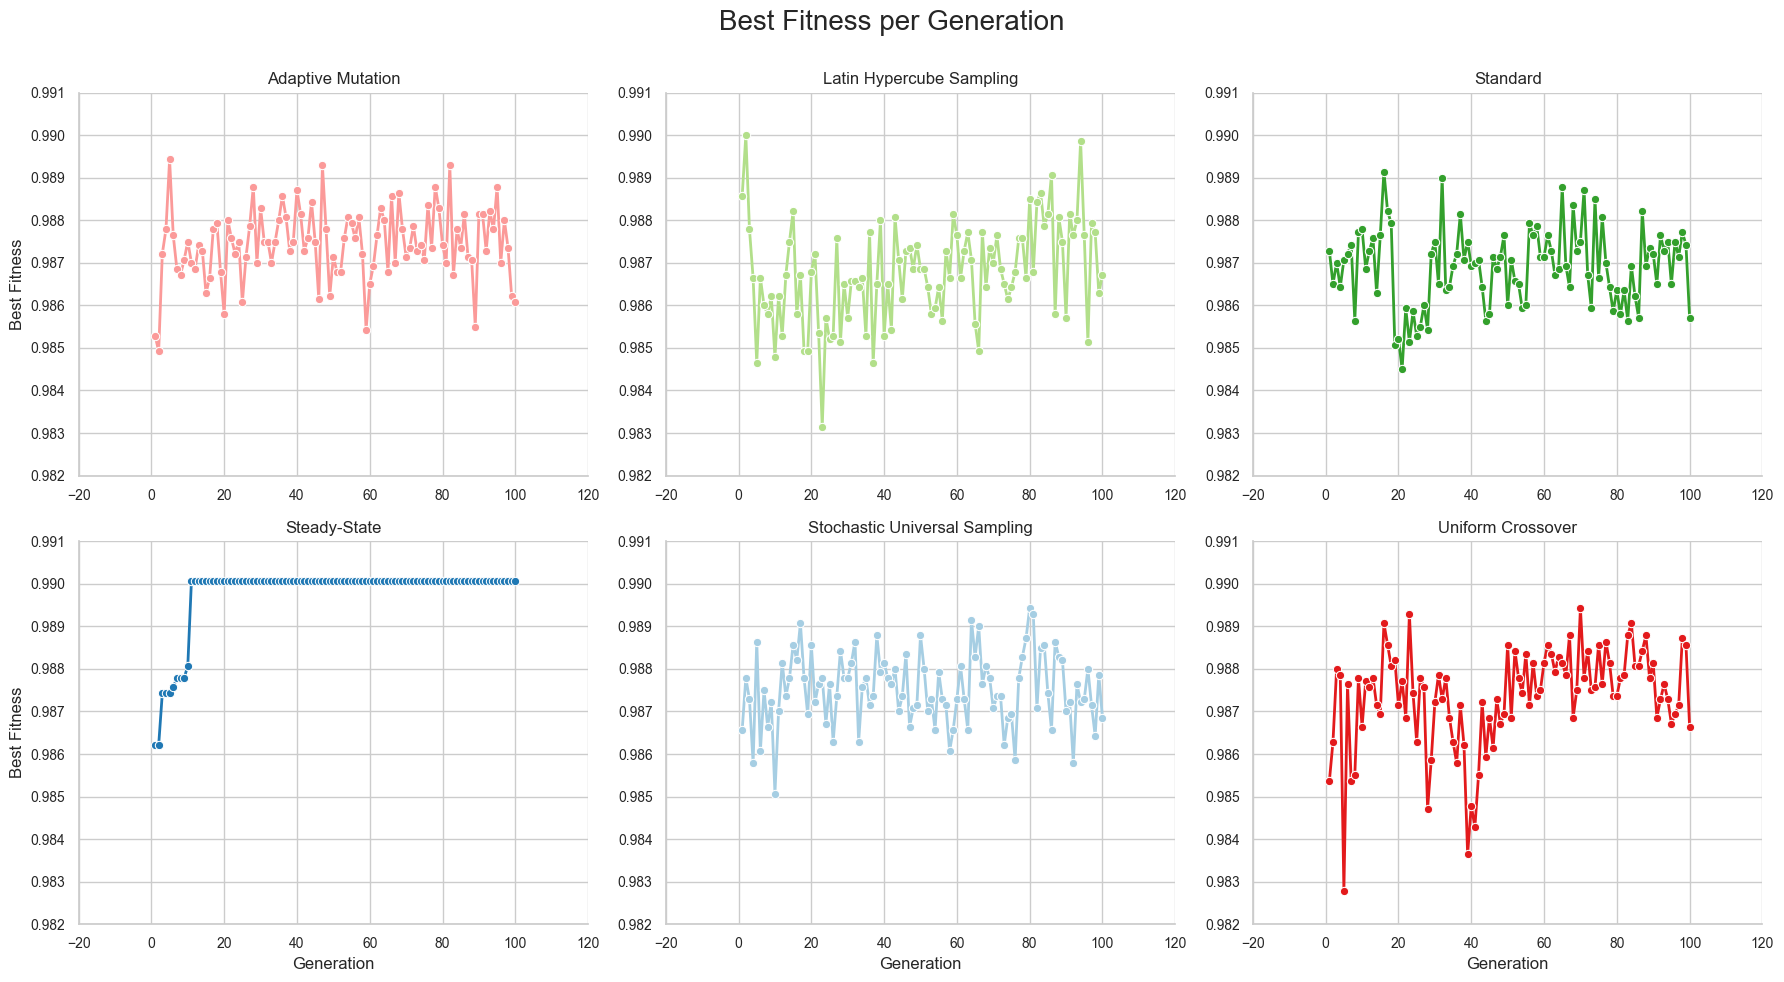

Saved plot to plots/faceted_best_fitness_plot_high_quality.png


In [157]:
plot2 = sns.relplot(
    data=best_fitness_combined_df,
    x='generation',
    y='fitness',
    hue='variants',
    col='variants',
    col_wrap=3,             # Wrap columns after 3 plots
    kind='line',
    marker='o',
    height=5,         
    aspect=1.2,             
    linewidth=2,            
    palette=color_map,
    legend=False
)


for ax in plot2.axes.flat:
    ax.tick_params(labelbottom=True, labelleft=True)
    
plot2.set_titles("{col_name}", fontsize=14)
plot2.set_xlabels('Generation', fontsize=12)
plot2.set_ylabels('Best Fitness', fontsize=12)
plot2.set_xticklabels(fontsize=10)
plot2.set_yticklabels(fontsize=10)


plot2.fig.suptitle('Best Fitness per Generation', fontsize=20)
plot2.fig.subplots_adjust(top=0.92)

plt.tight_layout(rect=[0, 0, 1, 0.98]) 

plot2_file = 'plots/faceted_best_fitness_plot_high_quality.png'
plt.savefig(plot2_file, dpi=300)
plt.show()
print(f"Saved plot to {plot2_file}")
plt.close()

/var/folders/zn/rfsv9ts17k3fzwd8pvt9h30r0000gn/T/ipykernel_4667/446176253.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  box_plot = sns.boxplot(


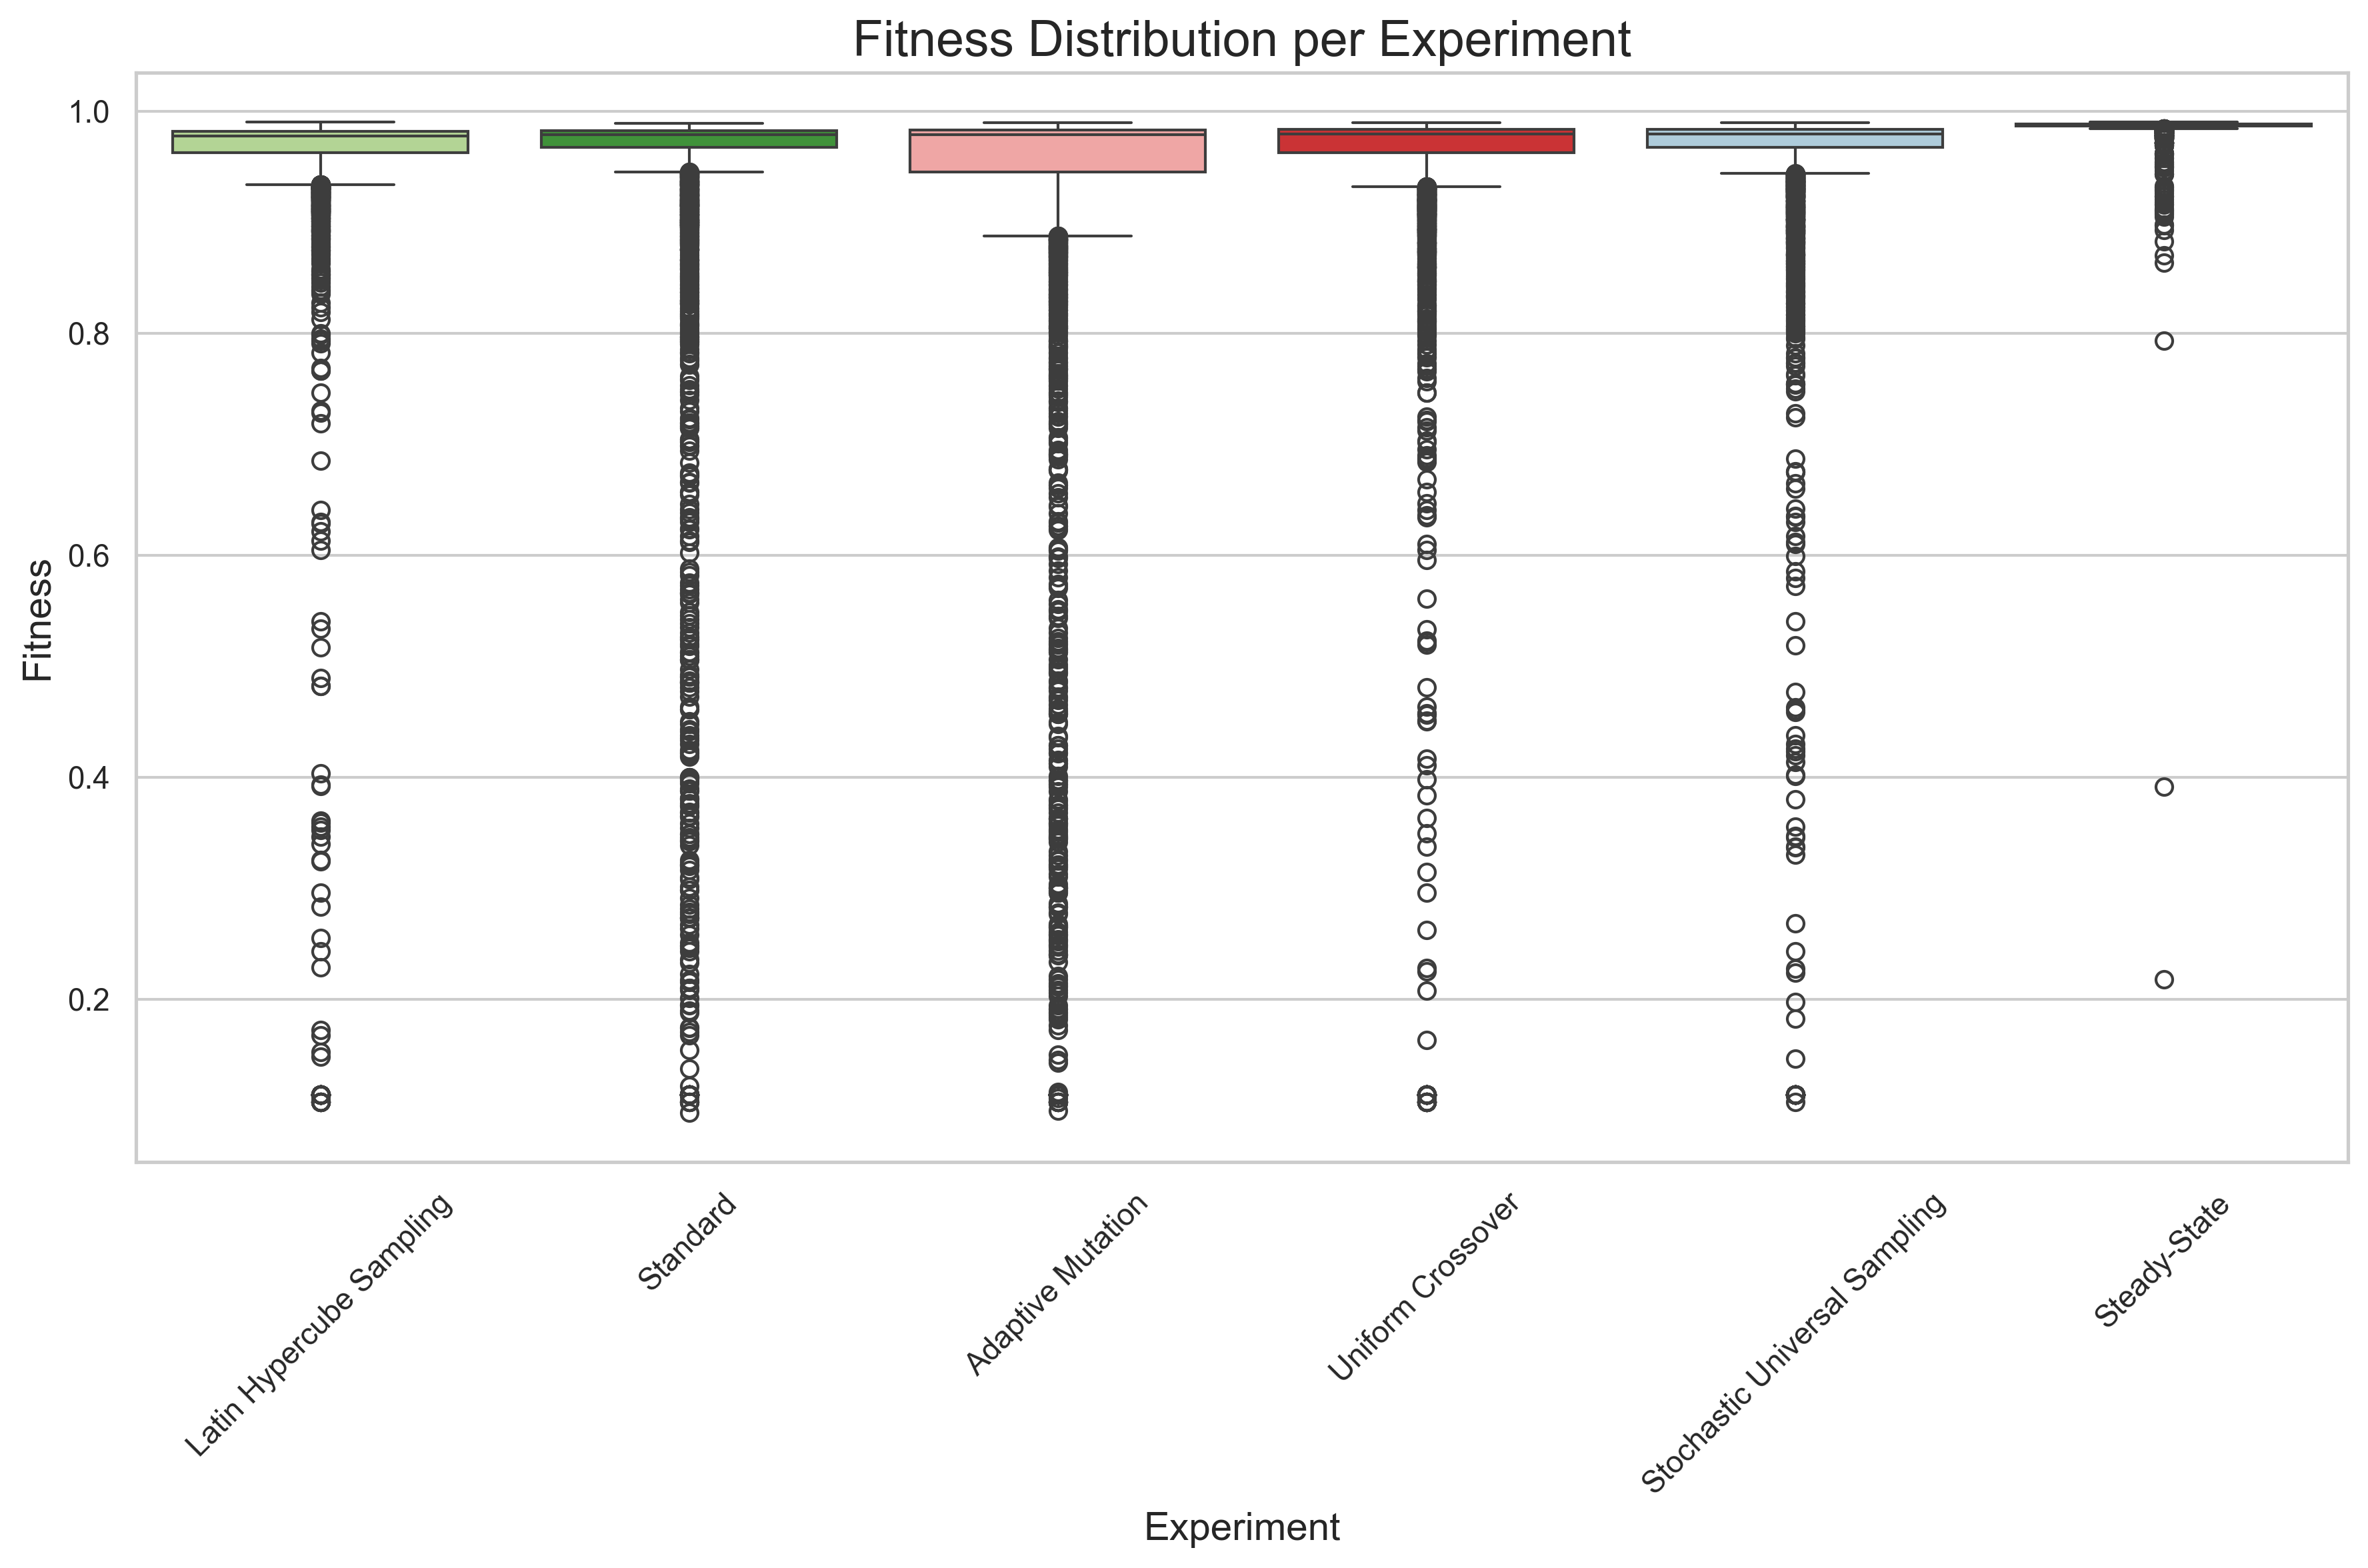


Saved box plot to plots/fitness_boxplot.png


In [158]:
median_fitness = combined_df.groupby('variants')['fitness'].median()
sorted_variants = median_fitness.sort_values().index

plt.figure(figsize=(12, 8), dpi=300)
sns.set_theme(style="whitegrid")

box_plot = sns.boxplot(
    data=combined_df,
    x='variants',
    y='fitness',
    palette=color_map,
    order=sorted_variants
)

plt.title('Fitness Distribution per Experiment', fontsize=18)
plt.xlabel('Experiment', fontsize=14)
plt.ylabel('Fitness', fontsize=14)
plt.xticks(rotation=45) 
plt.tight_layout()

plot_file = 'plots/fitness_boxplot.png'
plt.savefig(plot_file, dpi=300, bbox_inches='tight')
plt.show()
print(f"\nSaved box plot to {plot_file}")
plt.close()

/var/folders/zn/rfsv9ts17k3fzwd8pvt9h30r0000gn/T/ipykernel_4667/1834828142.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  box_plot = sns.boxplot(


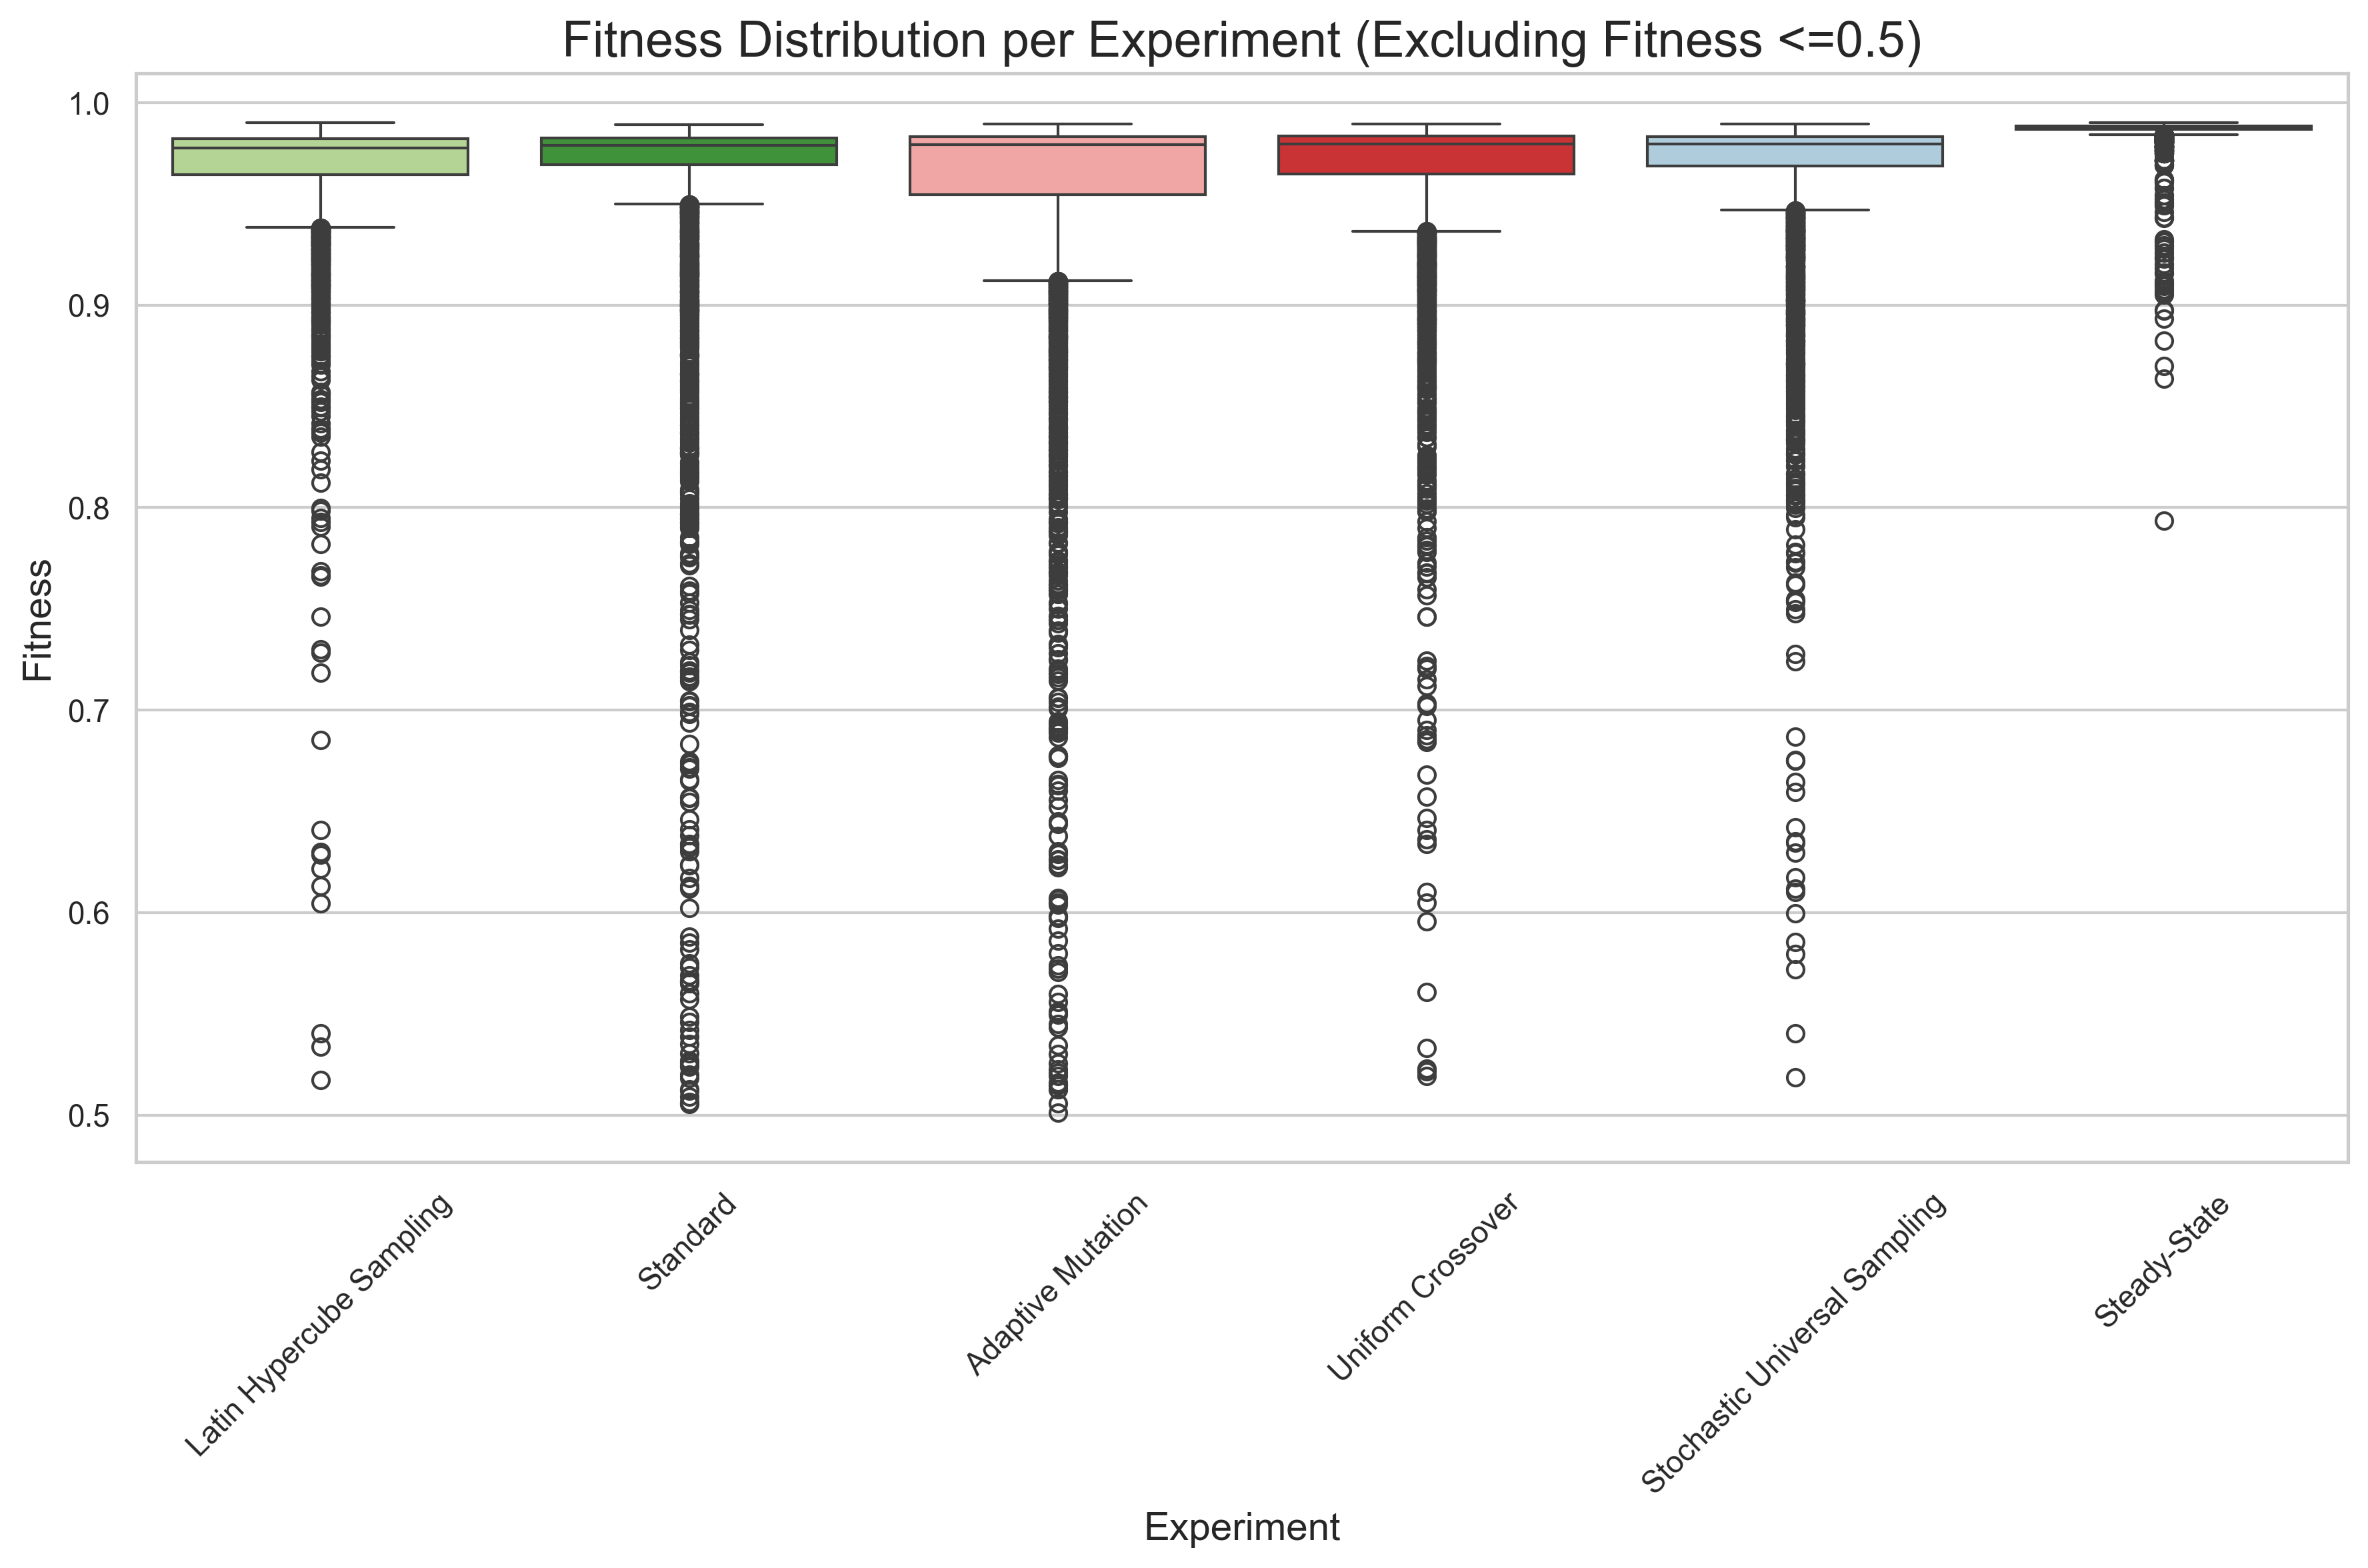


Saved box plot to plots/fitness_filtered_50_boxplot.png


In [159]:
filteres_combined_df = combined_df[combined_df['fitness'] >= 0.5]
median_fitness = combined_df.groupby('variants')['fitness'].median()
sorted_variants = median_fitness.sort_values().index

plt.figure(figsize=(12, 8), dpi=300)
sns.set_theme(style="whitegrid")

box_plot = sns.boxplot(
    data=filteres_combined_df,
    x='variants',
    y='fitness',
    palette=color_map,
    order=sorted_variants
)

plt.title('Fitness Distribution per Experiment (Excluding Fitness <=0.5)', fontsize=18)
plt.xlabel('Experiment', fontsize=14)
plt.ylabel('Fitness', fontsize=14)
plt.xticks(rotation=45) 
plt.tight_layout()

plot_file = 'plots/fitness_filtered_50_boxplot.png'
plt.savefig(plot_file, dpi=300, bbox_inches='tight')
plt.show()
print(f"\nSaved box plot to {plot_file}")
plt.close()

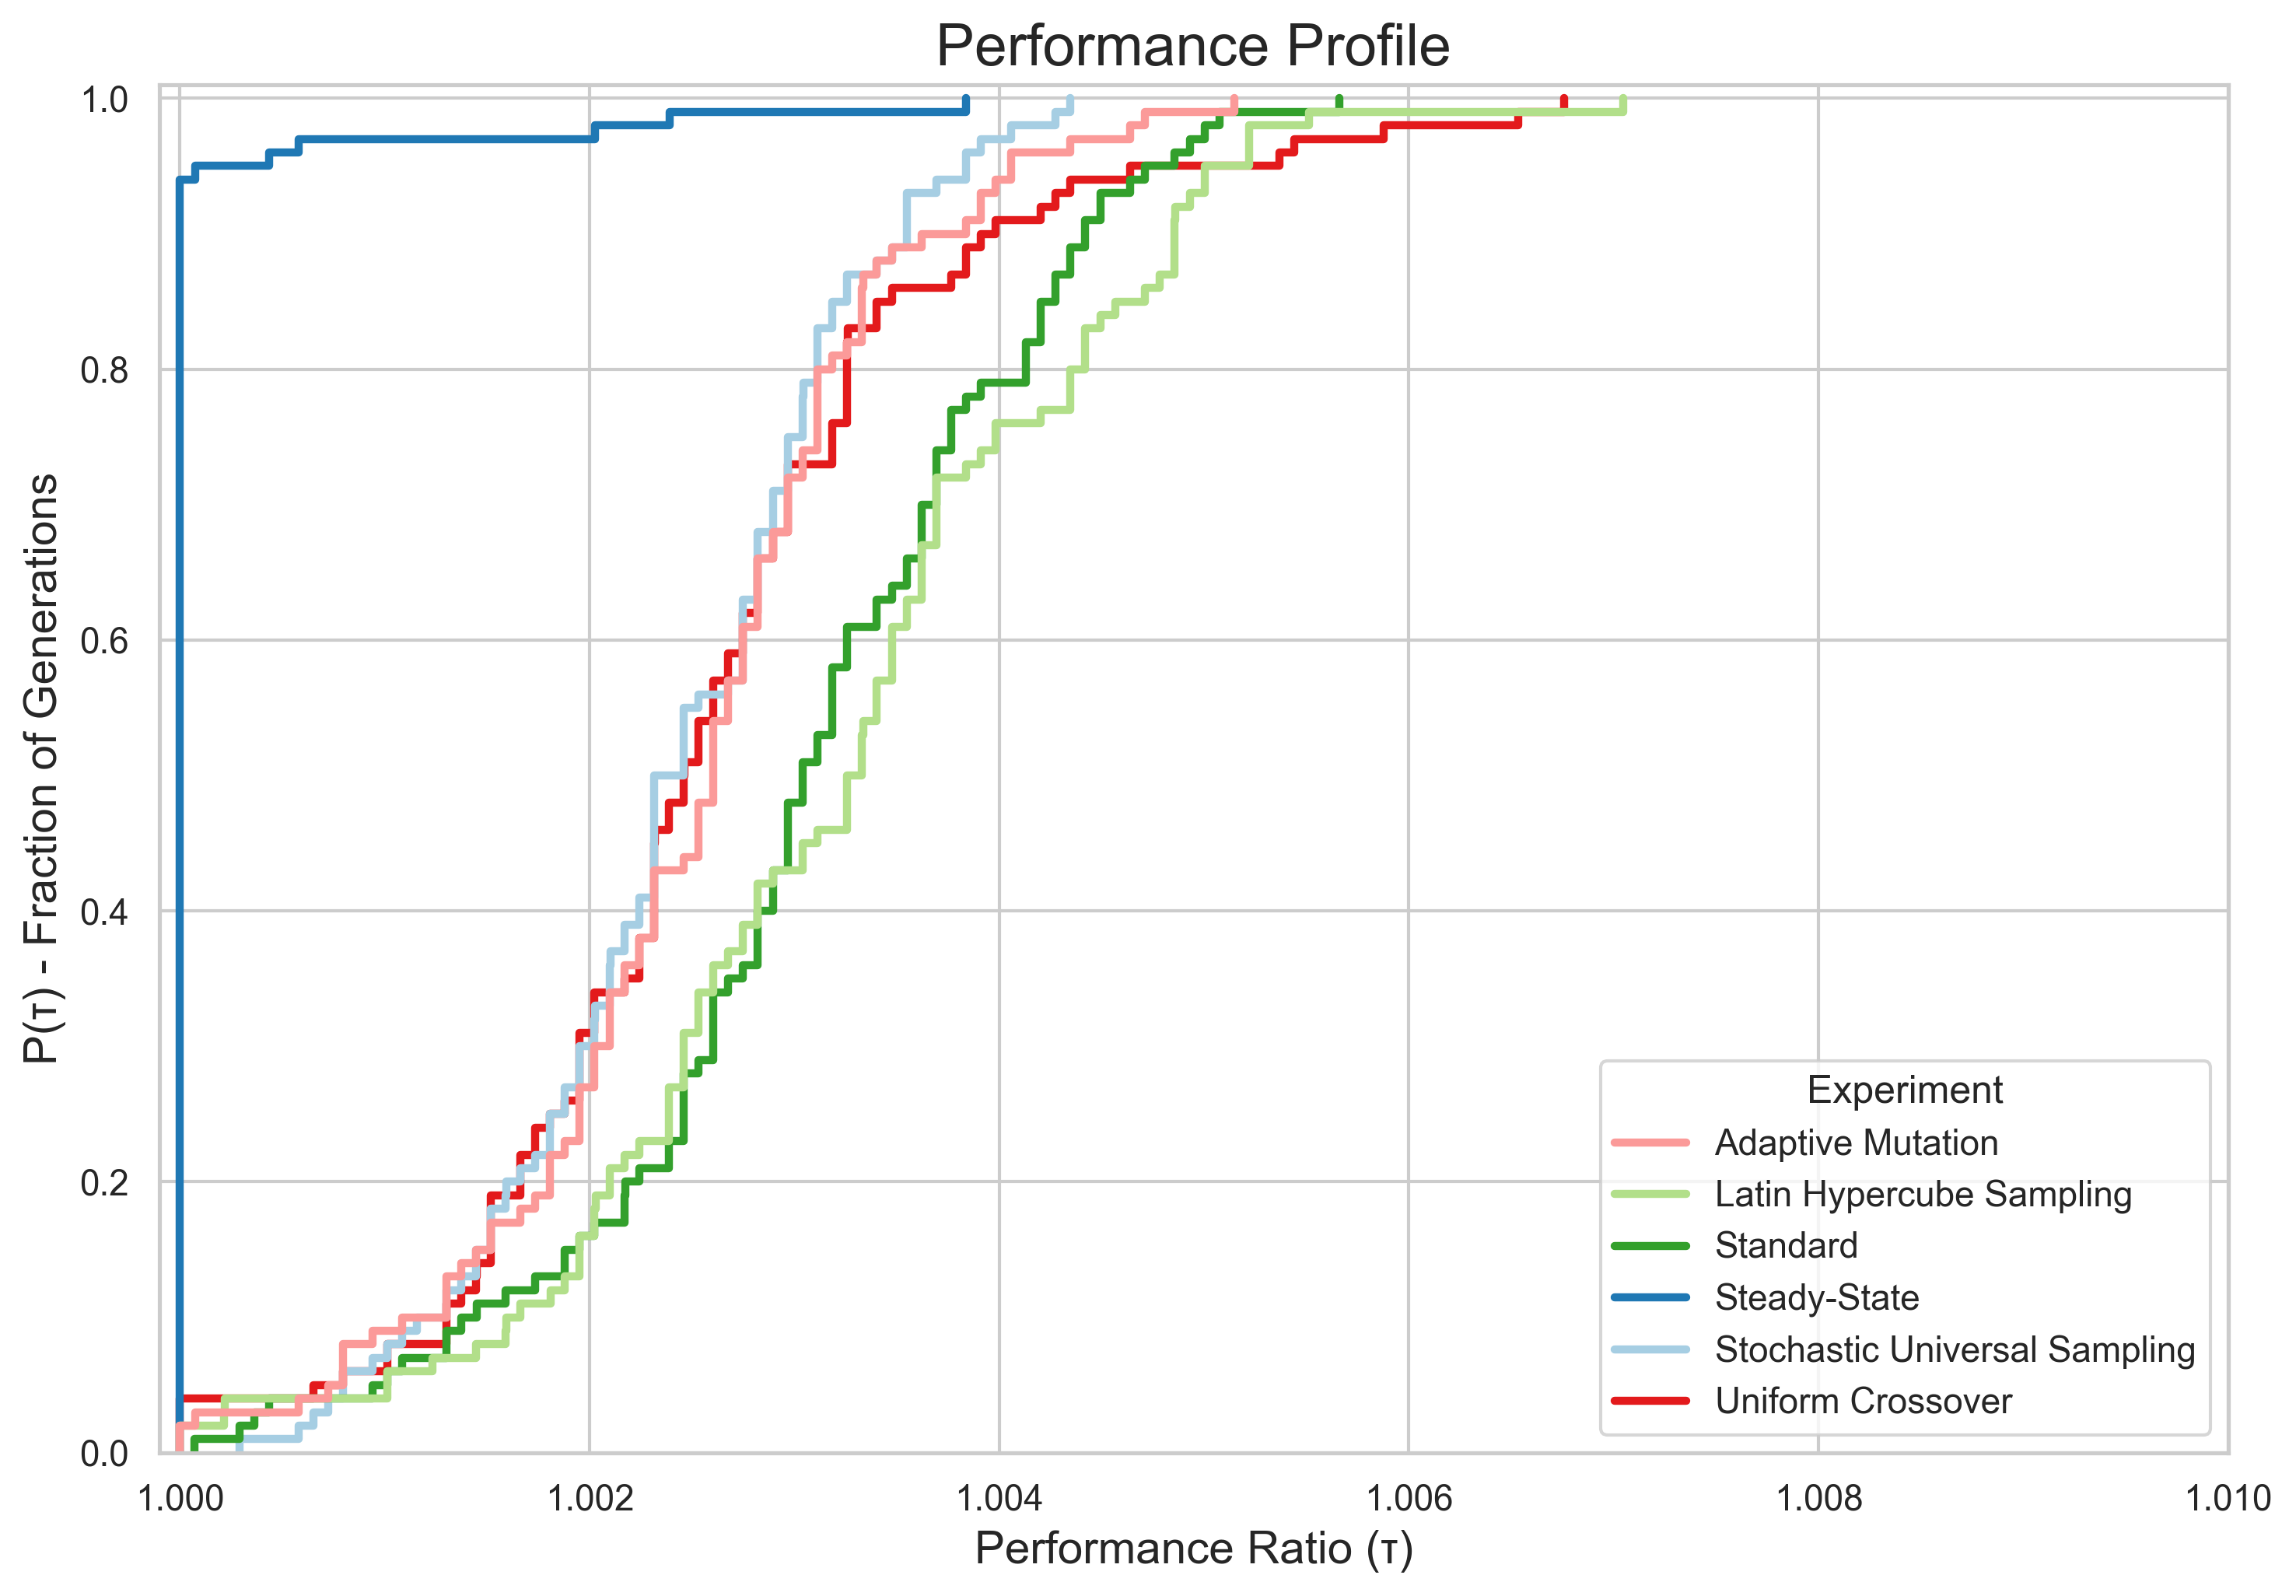


Saved plot to plots/performance_profile.png


In [160]:
best_fitness_df = combined_df.groupby(['variants', 'generation'])['fitness'].max().reset_index()

best_per_gen = best_fitness_df.groupby('generation')['fitness'].max().reset_index()
best_per_gen = best_per_gen.rename(columns={'fitness': 'best_in_gen'})

profile_df = pd.merge(best_fitness_df, best_per_gen, on='generation')

profile_df['performance_ratio'] = np.where(
    profile_df['fitness'] > 0,
    profile_df['best_in_gen'] / profile_df['fitness'],
    np.inf  
)


plt.figure(figsize=(10, 7), dpi=300)
sns.set_theme(style="whitegrid")

performance_plot = sns.ecdfplot(
    data=profile_df,
    x='performance_ratio',
    hue='variants',
    palette=color_map,
    linewidth=2.5,
    stat="proportion",
    # legend=False  
)

plt.title('Performance Profile', fontsize=18)
plt.xlabel('Performance Ratio (τ)', fontsize=14)
plt.ylabel('P(τ) - Fraction of Generations', fontsize=14)

plt.xlim(0.9999, 1.01)
plt.ylim(0, 1.01)

# plt.legend(title='Variants', loc='lower right')
sns.move_legend(performance_plot, "lower right", title='Experiment')
plt.tight_layout()

plot_file = 'plots/performance_profile.png'
plt.savefig(
    plot_file, 
    dpi=300,
    bbox_inches='tight',
)
plt.show()
print(f"\nSaved plot to {plot_file}")
plt.close()

In [161]:
idx_max_fitness = best_fitness_combined_df.groupby('variants')['fitness'].idxmax()
idx_max_fitness = idx_max_fitness.dropna()

first_peak_df = best_fitness_combined_df.loc[idx_max_fitness]
first_peak_df = first_peak_df.sort_values('generation')

print("\n--- Data on First Peak Fitness (NaNs dropped) ---")
print(first_peak_df)



--- Data on First Peak Fitness (NaNs dropped) ---
                          variants  generation   fitness
101       Latin Hypercube Sampling           2  0.990000
4                Adaptive Mutation           5  0.989429
310                   Steady-State          11  0.990071
215                       Standard          16  0.989143
569              Uniform Crossover          70  0.989429
479  Stochastic Universal Sampling          80  0.989429
